### Package and Data Imports

In [33]:
#Importing packages
import math #Various math
import numpy as np #Linear algebra
import scipy #Optimization
import scipy.optimize as sco #Portfolio optimization
from pandas_datareader import data #Package for pulling data from the web
import matplotlib.pyplot as plt #Basic plotting package
import matplotlib.patches as mpatches #Colorscale help
import seaborn as sns #Enhanced plots
sns.set_style('darkgrid') #Plot styling
import pandas as pd #Dataframes
import statistics #Stats
from datetime import date #System clock

#Defining the equities we're interested in 
tickers = ['FOOD.TO','SMPL','VERY.CN']

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
equity_data = data.DataReader(tickers, 
                       start='2020-1-1', #selecting the starting date (18 months)
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Checking the 20 most recent values
equity_data.tail(10)

Symbols,FOOD.TO,SMPL,VERY.CN
Date,,,
2021-01-25,13.75,28.400000,7.08
2021-01-26,14.53,28.969999,7.10
2021-01-27,12.70,28.530001,6.56
2021-01-28,12.23,28.780001,7.03
2021-01-29,11.82,28.540001,6.77
2021-02-01,12.30,29.090000,6.65
2021-02-02,12.79,29.860001,6.62
2021-02-03,13.07,28.879999,7.10
2021-02-04,12.50,28.680000,7.16


### Comparing Equity Performance

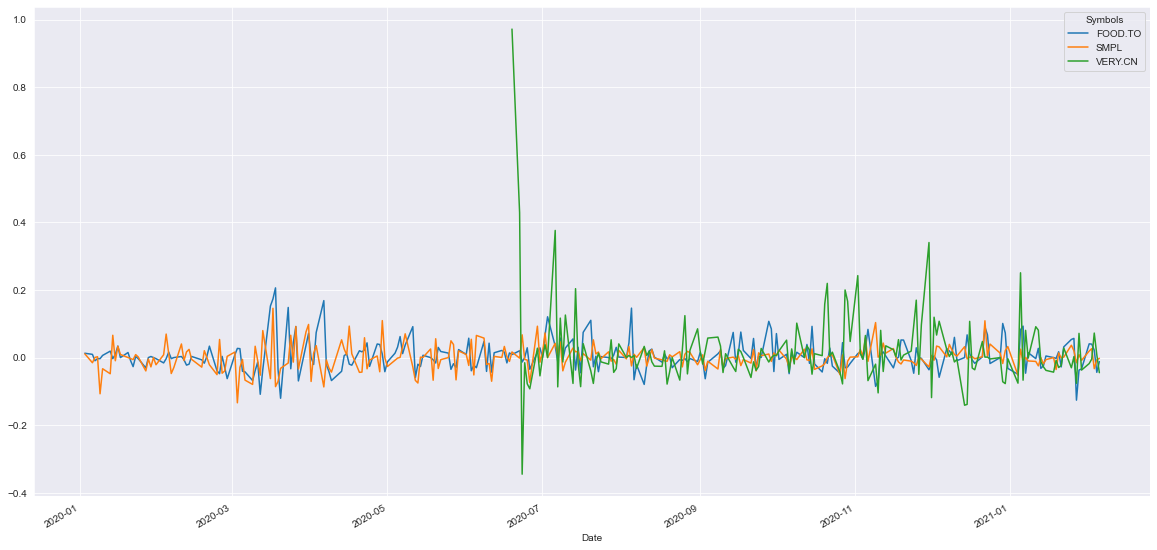

In [34]:
#Taking a glance at the chart for our currency conversion rates in question (PERCENT CHANGE)
data_pct_change = equity_data.pct_change() #calculating the percent change of the equity over the period
data_pct_change.plot(grid=True, figsize=(20, 10));

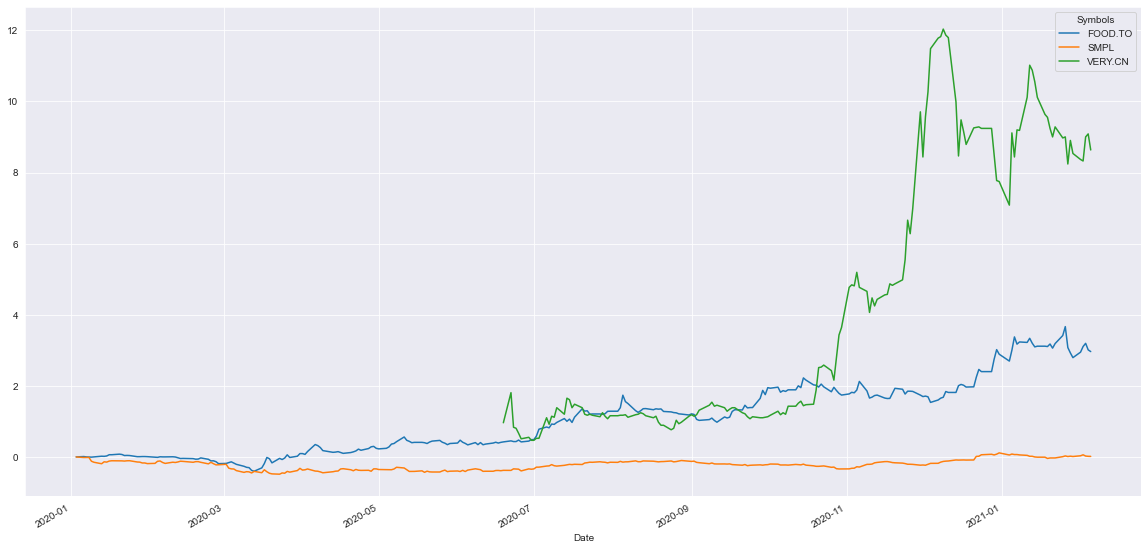

In [35]:
#Taking a look at cumulative returns
cumulative_returns = ((1 + data_pct_change).cumprod() - 1) #calculating the cumulative returns of the equity over the period
cumulative_returns.plot(figsize = (20,10))

### 30/90d Rolling Averages

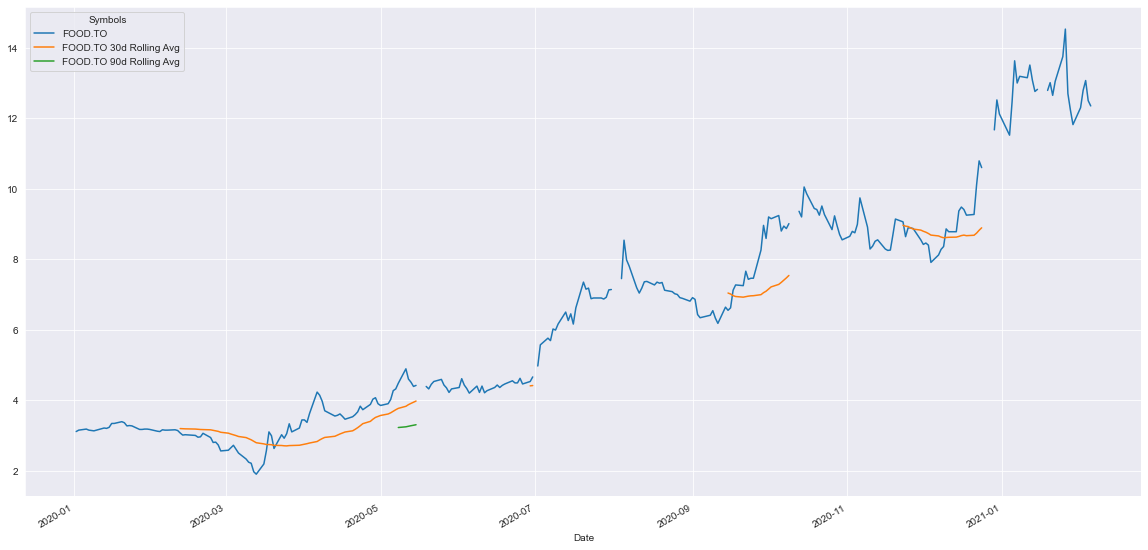

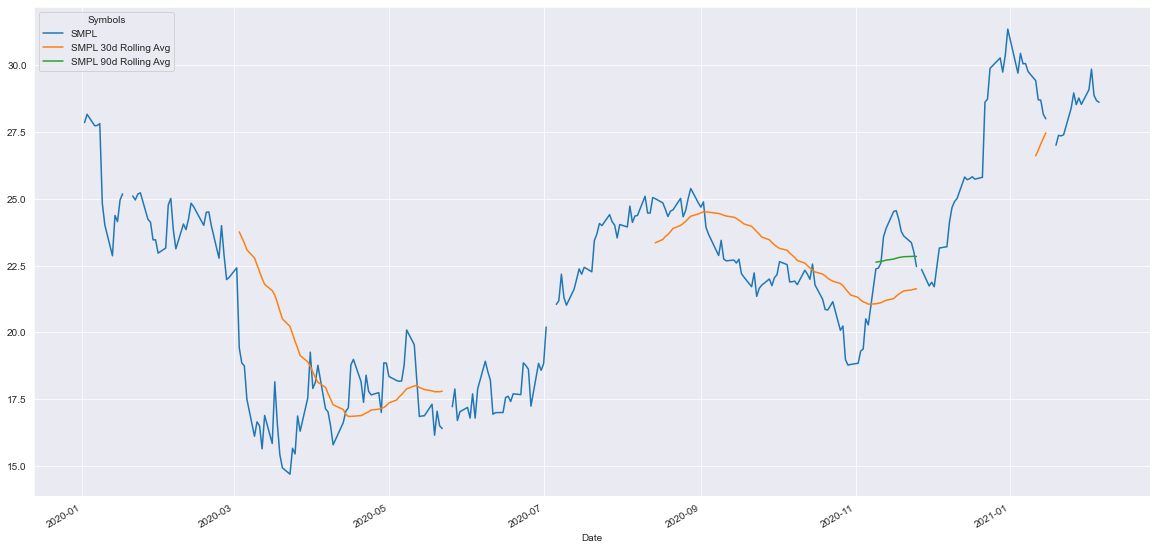

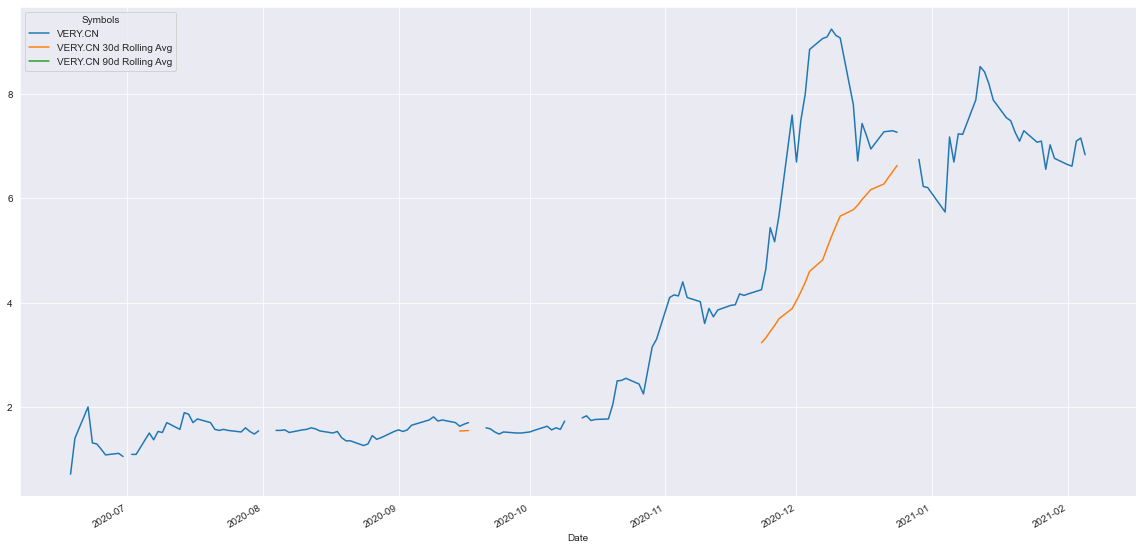

In [36]:
#Calculating 30 & 90 day rolling averages 

#FOOD.TO
equity_data['FOOD.TO 30d Rolling Avg'] = np.round(equity_data['FOOD.TO'].rolling(window=30).mean(), 5) #30d rolling avg
equity_data['FOOD.TO 90d Rolling Avg'] = np.round(equity_data['FOOD.TO'].rolling(window=90).mean(), 5) #90d rolling avg
equity_data[['FOOD.TO', 'FOOD.TO 30d Rolling Avg', 'FOOD.TO 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#SMPL
equity_data['SMPL 30d Rolling Avg'] = np.round(equity_data['SMPL'].rolling(window=30).mean(), 5) #30d rolling avg
equity_data['SMPL 90d Rolling Avg'] = np.round(equity_data['SMPL'].rolling(window=90).mean(), 5) #90d rolling avg
equity_data[['SMPL', 'SMPL 30d Rolling Avg', 'SMPL 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#VERY.CN
equity_data['VERY.CN 30d Rolling Avg'] = np.round(equity_data['VERY.CN'].rolling(window=30).mean(), 5) #30d rolling avg
equity_data['VERY.CN 90d Rolling Avg'] = np.round(equity_data['VERY.CN'].rolling(window=90).mean(), 5) #90d rolling avg
equity_data[['VERY.CN', 'VERY.CN 30d Rolling Avg', 'VERY.CN 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

### 30/90d Rolling Averages [Cumulative Returns]

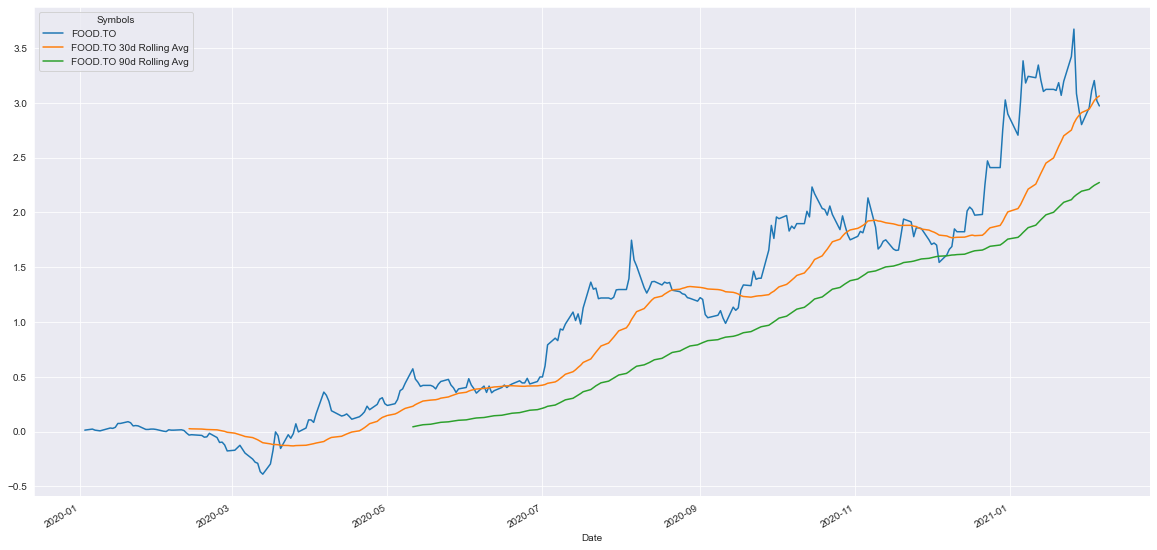

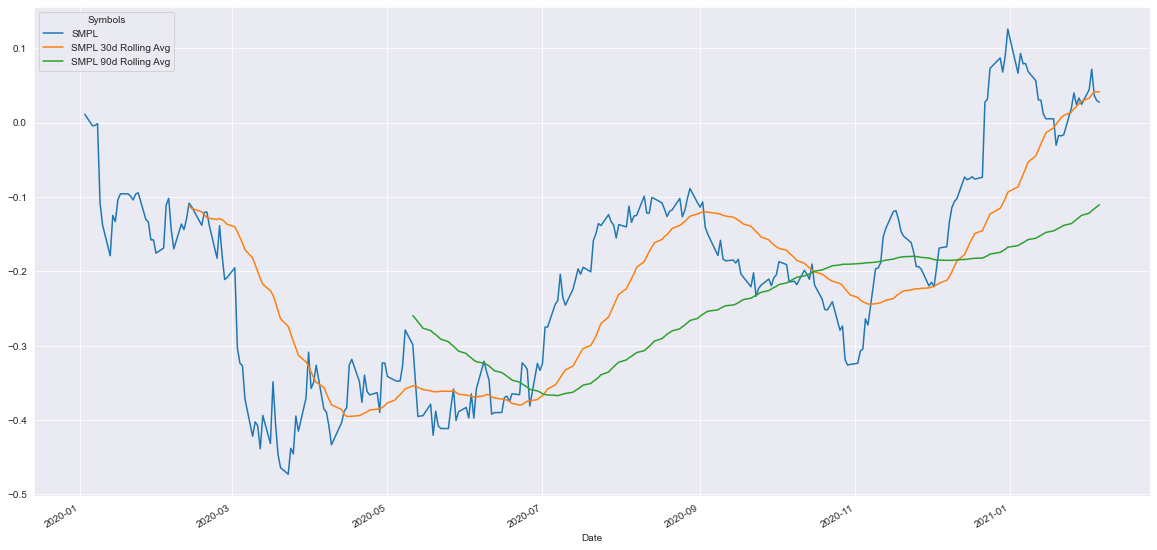

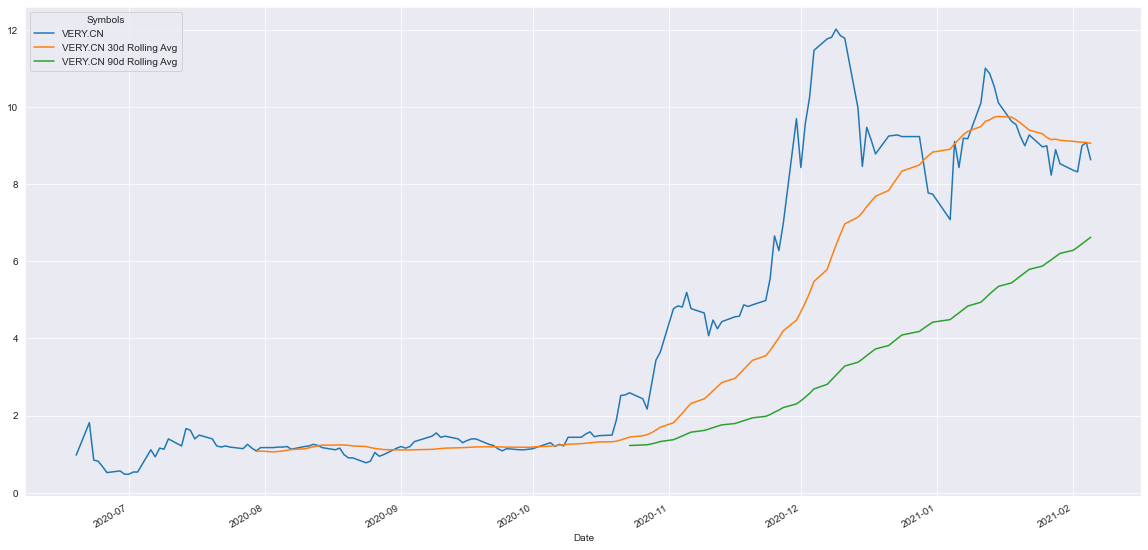

In [37]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#FOOD.TO
cumulative_returns['FOOD.TO 30d Rolling Avg'] = np.round(cumulative_returns['FOOD.TO'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['FOOD.TO 90d Rolling Avg'] = np.round(cumulative_returns['FOOD.TO'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['FOOD.TO', 'FOOD.TO 30d Rolling Avg', 'FOOD.TO 90d Rolling Avg']].plot(figsize=(20,10)) 

#SMPL
cumulative_returns['SMPL 30d Rolling Avg'] = np.round(cumulative_returns['SMPL'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['SMPL 90d Rolling Avg'] = np.round(cumulative_returns['SMPL'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['SMPL', 'SMPL 30d Rolling Avg', 'SMPL 90d Rolling Avg']].plot(figsize=(20,10)) 

#VERY.CN
cumulative_returns['VERY.CN 30d Rolling Avg'] = np.round(cumulative_returns['VERY.CN'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['VERY.CN 90d Rolling Avg'] = np.round(cumulative_returns['VERY.CN'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['VERY.CN', 'VERY.CN 30d Rolling Avg', 'VERY.CN 90d Rolling Avg']].plot(figsize=(20,10)) 

### Determining the Overall Return & Volatility of Each Equity

In [38]:
#FOOD.TO

#Return
equity_data['FOOD.TO Return'] = np.log(equity_data['FOOD.TO']/equity_data['FOOD.TO'].shift(1))
#30d moving volatility 
equity_data['FOOD.TO Mov_Volatility'] = equity_data['FOOD.TO Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#SMPL

#Return
equity_data['SMPL Return'] = np.log(equity_data['SMPL']/equity_data['SMPL'].shift(1))
#30d moving volatility 
equity_data['SMPL Mov_Volatility'] = equity_data['SMPL Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#VERY.CN

#Return
equity_data['VERY.CN Return'] = np.log(equity_data['VERY.CN']/equity_data['VERY.CN'].shift(1))
#30d moving volatility 
equity_data['VERY.CN Mov_Volatility'] = equity_data['VERY.CN Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling av

### Visualizing Trends

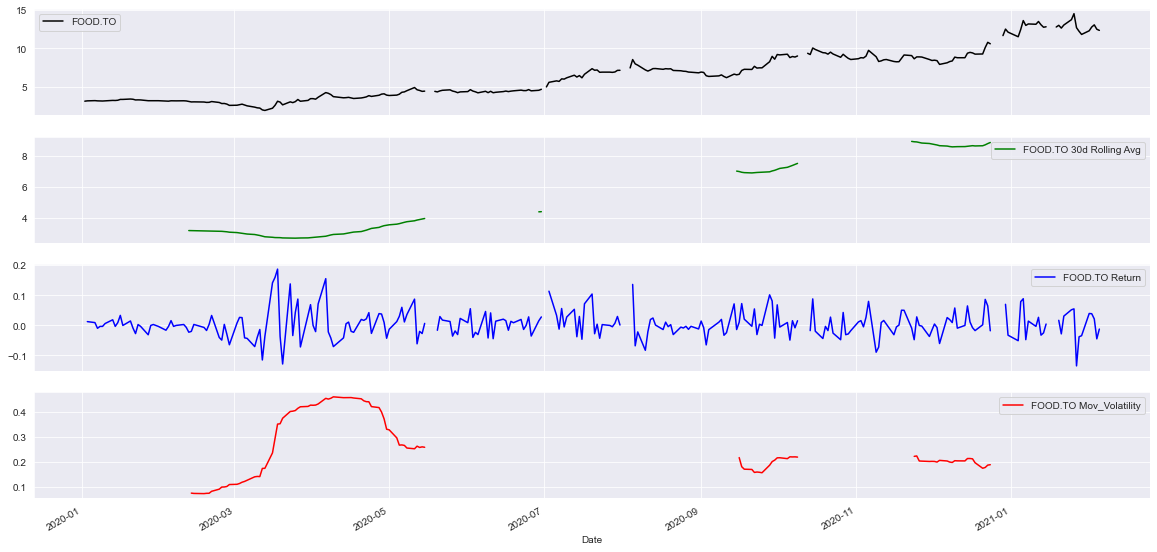

In [39]:
#Visualizing the results

#FOOD.TO
equity_data[['FOOD.TO','FOOD.TO 30d Rolling Avg','FOOD.TO Return','FOOD.TO Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

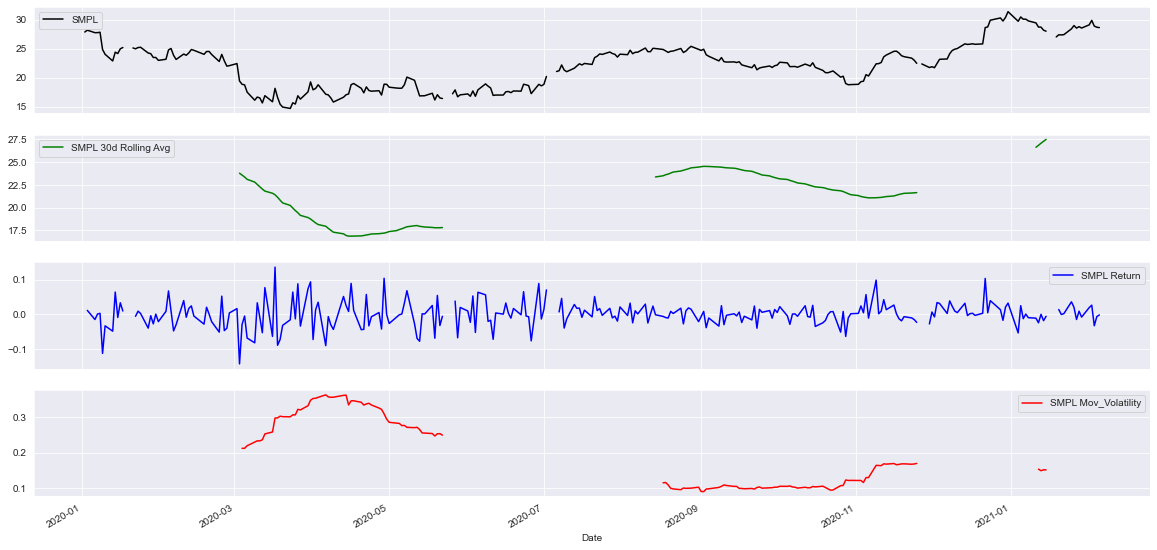

In [40]:
#SMPL
equity_data[['SMPL','SMPL 30d Rolling Avg','SMPL Return','SMPL Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

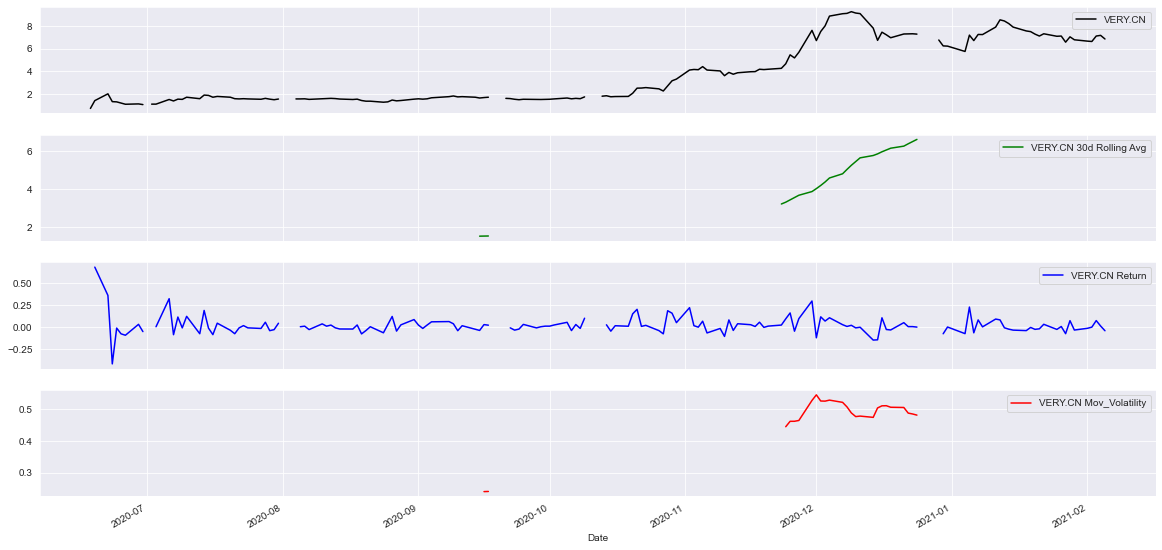

In [41]:
#VERY.CN
equity_data[['VERY.CN','VERY.CN 30d Rolling Avg','VERY.CN Return','VERY.CN Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

### Optimizing Portfolio Weights

In [42]:
#Defining the equities we're interested in 
tickers = ['FOOD.TO','SMPL','VERY.CN']

#Defining the size of the portfolio (# of equities)
size_portfolio = len(tickers)

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
portfolio_data = data.DataReader(tickers, 
                       start='2020-7-1', #selecting the starting date (36 months)
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Calculating returns
returns = np.log(portfolio_data/portfolio_data.shift(1))

#Calculating average return over a year's worth of trading days
returns.mean()*253

#Calculating covariance over a years's worth of trading days
returns.cov()*253

Symbols,FOOD.TO,SMPL,VERY.CN
Symbols,,,
FOOD.TO,0.458407,0.035996,-0.021201
SMPL,0.035996,0.151192,-0.046964
VERY.CN,-0.021201,-0.046964,1.431500


### Calculating Expected Return, Var & Vol for Fifty Thousand [50000] Potential Portfolio Weights Via Monte Carlo

In [43]:
#Creating empty arrays to store our values
pred_returns = [] 
pred_volatility = []

#Defining a for loop to perform the calculations we did above but this time we'll do it 5000 times
#Calculations and code are the exact same as above just now a for loop performs them for us over and over again
#Every iteration np.random will produce a new randomly weighted portfolio for us to try
for i in range (50000):
    weights = np.random.random(size_portfolio)
    weights /= np.sum(weights)
    pred_returns.append(np.sum(returns.mean() * weights) * 253)
    pred_volatility.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 253, weights))))

#Appending our results to the arrays we created above
pred_returns = np.array(pred_returns)
pred_volatility = np.array(pred_volatility)

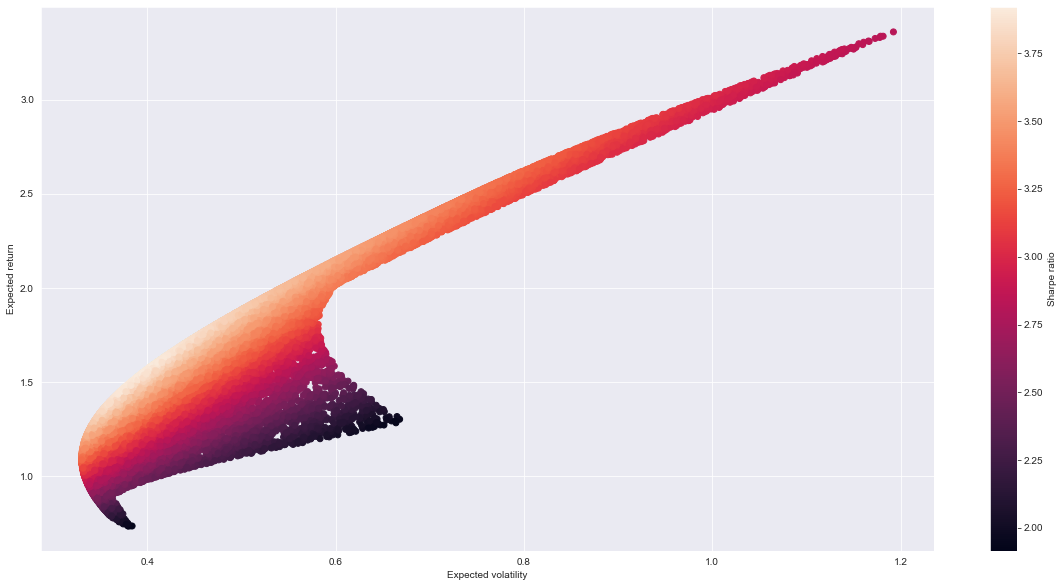

In [44]:
#Visualizing our results
plt.figure(figsize=(20, 10))
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

### Optimizing Cash Weightings Mathematically

In [45]:
#This function takes in an array of portfolio weights as an input and returns an array of the predicted returns, voltatility
#and Sharpe ratios (automating the same calculations done above)
def stats(weights):
    weights = np.array(weights)
    pred_returns = np.sum(returns.mean() * weights) * 253
    pred_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 253, weights)))
    return np.array([pred_returns,pred_volatility,pred_returns / pred_volatility])

In [46]:
#Creating a function to minimize the Sharpe ratio
def min_sharpe_func(weights):
    return -stats(weights)[2]

#Creating a list of constraints for the optimization 
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Creating a list of bounds for the optimiation
bounds = tuple((0, 1) for x in range(size_portfolio))

#Scaling our portfolio weights and creating a nice array
scaled = size_portfolio * [1./ size_portfolio,]

#Running the optimization function for Sharpe ratio
opts_Sharpe = sco.minimize(min_sharpe_func, scaled, method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [57]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL PORTFOLIO WEIGHTS FOR SHARPE RATIO [FOOD.TO, SMPL, VERY.CN]')
print((opts_Sharpe['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our stats() function
print('PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_Sharpe['x'].round(3)))

OPTIMAL PORTFOLIO WEIGHTS FOR SHARPE RATIO [FOOD.TO, SMPL, VERY.CN]
[0.253 0.492 0.255]
PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[1.53558242 0.39174634 3.91983858]


In [58]:
#Repeating for variance
def min_variance_func(weights):
    return stats(weights)[1]**2

#Optimizing using same contraints and bounds as before
opts_variance = sco.minimize(min_variance_func, size_portfolio * [1. / size_portfolio,], method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [61]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [FOOD.TO, SMPL, VERY.CN]')
print((opts_variance['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our created stats() function
print('PREDICTED OUTCOMES FOR OPTIMAL VARIANCE PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_variance['x'].round(3)))

OPTIMAL PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [FOOD.TO, SMPL, VERY.CN]
[0.187 0.71  0.102]
PREDICTED OUTCOMES FOR OPTIMAL VARIANCE PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[1.09120019 0.33028284 3.30383561]


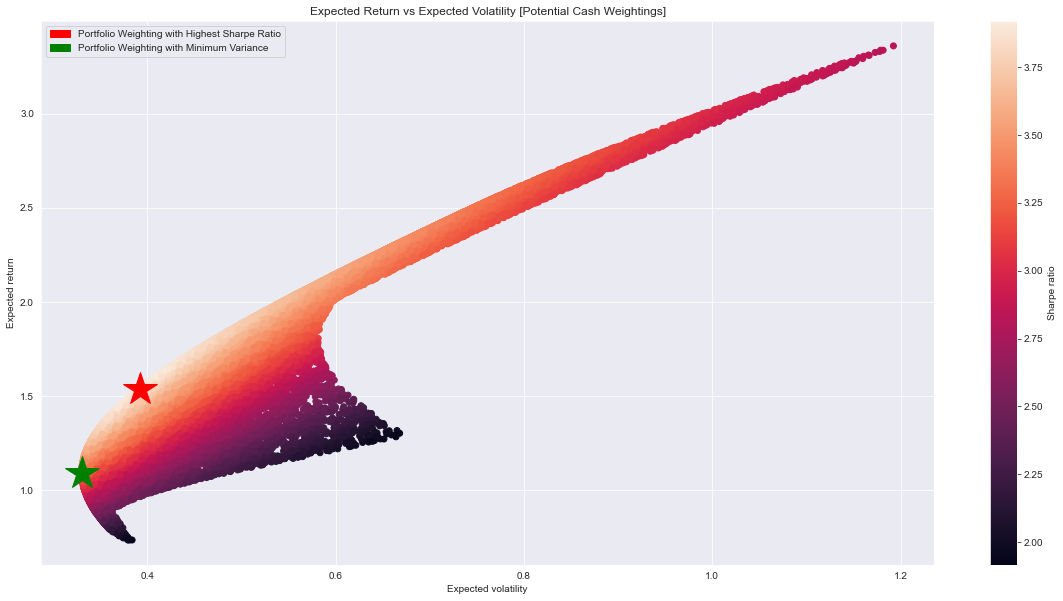

In [55]:
#Visualizing our results
plt.figure(figsize=(20, 10))

#Plotting potential random portfolio compositions
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')

#Plotting porftolio with highest Sharpe ratio (Blue)
plt.plot(stats(opts_Sharpe['x'])[1], stats(opts_Sharpe['x'])[0],
         'r*', markersize=35.0)

#Plotting minimum variance portfolio (Green)
plt.plot(stats(opts_variance['x'])[1], stats(opts_variance['x'])[0],
         'g*', markersize=35.0)

#Creating legend
import matplotlib.patches as mpatches
red = mpatches.Patch(color='r', label='Portfolio Weighting with Highest Sharpe Ratio')
green = mpatches.Patch(color='g', label='Portfolio Weighting with Minimum Variance')
plt.legend(handles=[red,green])

#Creating labels
plt.title('Expected Return vs Expected Volatility [Potential Cash Weightings]')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

In [62]:
#Comparing Sharpe Ratios & Volatilites
#Optimal Sharpe ratio portfolio
print("OPTIMAL SHARPE PORTFOLIO: [25% FOOD.TO, 50% SMPL, 25% VERY.CN]")
print("EXPECTED VOLTAILITY:",opts_Sharpe['x'][1].round(3))
print("EXPECTED RETURN", opts_Sharpe['x'][0].round(3))
print("EXPECTED SHARPE RATIO", stats(opts_Sharpe['x']).round(3)[2])
print("")

#Minimum variance portfolio
print("MINIMUM VARIANCE PORTFOLIO: [19% FOOD.TO, 71% SMPL, 10% VERY.CN]")
print("EXPECTED VOLTAILITY:",opts_variance['x'][1].round(3))
print("EXPECTED RETURN", opts_variance['x'][0].round(3))
print("EXPECTED SHARPE RATIO", stats(opts_variance['x']).round(3)[2])
print("")

OPTIMAL SHARPE PORTFOLIO: [25% FOOD.TO, 50% SMPL, 25% VERY.CN]
EXPECTED VOLTAILITY: 0.492
EXPECTED RETURN 0.253
EXPECTED SHARPE RATIO 3.92

MINIMUM VARIANCE PORTFOLIO: [19% FOOD.TO, 71% SMPL, 10% VERY.CN]
EXPECTED VOLTAILITY: 0.71
EXPECTED RETURN 0.187
EXPECTED SHARPE RATIO 3.307

